## Imports

In [63]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import sys
sys.path.append('/Users/tudorlapusan/Documents/workspaces/ml/DecisionTreeStructure/')

In [65]:
import pandas as pd
import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from tree.decision_tree_structure import DecisionTreeStructure

## Data load

In [5]:
train_raw = pd.read_csv("../data/train_titanic.csv")

In [6]:
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

In [8]:
train_raw.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_raw.median()["Age"]

28.0

In [16]:
train_raw.fillna({"Age":train_raw.median()["Age"]}, inplace=True)

## Model training

In [17]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
target = "Survived"

In [66]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(train_raw[features], train_raw[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Decision tree structure visualizations

### Graphviz 

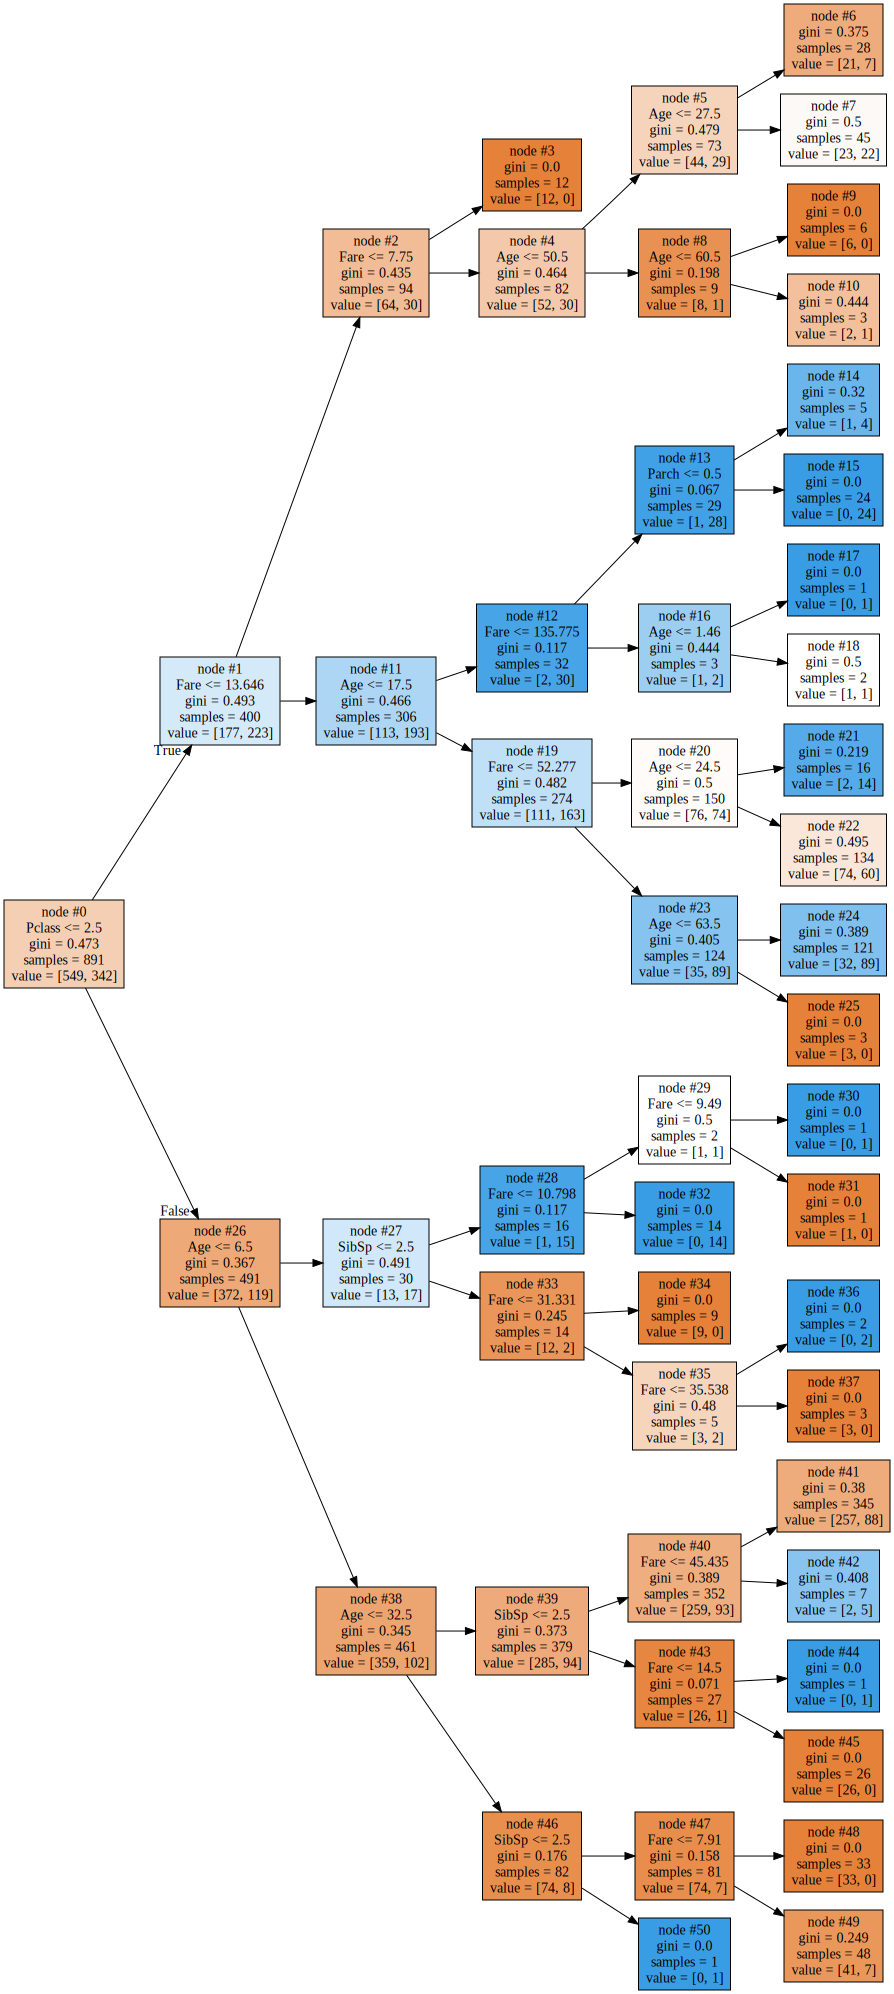

In [69]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=features, 
                         filled=True, rotate=True, node_ids=True)
graphviz.Source(dot_data)

### Decision Tree Structure

In [134]:
dts = DecisionTreeStructure(model, features)

Predicion path for input 
Pclass     3.0
Age        4.0
SibSp      1.0
Parch      1.0
Fare      16.7
Name: 10, dtype: float64


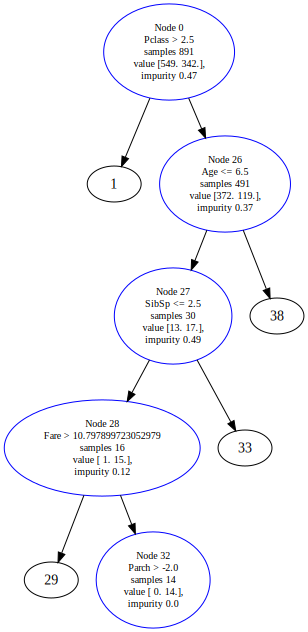

In [135]:
dts.show_decision_tree_prediction_path(train_raw[features].iloc[10])